# Customer Churn Prediction in Telecommunication: Proactive Strategies for Sustainable Growth

## Introduction

In the dynamic world of telecommunications, customer churn remains a pressing challenge for companies striving to achieve sustained success. Customers have alot of options and evolving preferences, accurately predicting churn has become important to retain and satisfy them. Customer churn is basically the loss of customers.

In this project, we use Supervised Machine Learning (classification) to explore the significance of churn analytics as a strategic tool for telecommunication companies to proactively identify potential risk factors for churn, optimize retention efforts, and cultivate lasting customer relationships. By leveraging data-driven insights and advanced analytics, companies can gain a competitive edge and ensure sustainable growth in an ever-changing industry.

## 1. Business Understanding
The churn analytics predictive model is a data-driven solution designed to address the persistent challenge of customer churn in subscription-based industries. This model aims to identify customers at risk of churn, enabling businesses to take proactive measures and implement targeted retention strategies. 

The primary objective is to reduce customer churn rates and retain valuable customers by providing insights into customer behavior, preferences, and patterns. Utilizing machine learning models such as logistic regression and decision trees, the model evaluates the data to build accurate predictions. 

Its performance is assessed through metrics like accuracy, precision, recall and F1-score. Armed with the model's insights, businesses can create personalized offers, marketing campaigns, and proactive customer support initiatives, thus improving customer satisfaction and fostering loyalty. 

### Hypothesis

**Null Hypothesis (H0)**:
"There is no significant relationship between customer tenure, monthly charges, total charges, and churn rate in the telecom company."

**Alternative Hypothesis (Ha)**:
"There is a significant relationship between customer tenure, monthly charges, total charges, and churn rate in the telecom company."

### Research Questions

1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?

4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?




## 2. Data Understanding

## Installing libraries  and Packages
Here is the section to import all the packages/libraries that will be used through this notebook.

In [255]:
# %pip install pyodbc
# %pip install python-dotenv 
# %pip install openpyxl
# %pip install imbalanced-learn

In [256]:
# Database connections

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

## Data Loading
### Accessing first dataset from the database
The first 3000 records of the dataset can be found in a remote database.

-   **pyodbc**: A package for creating connection strings to your remote database
-   **python-dotenv**: A package for creating environment variables that will help you hide sensitve configuration informantion such as database credentials and API keys

The second dataset (2000 records) is already available as a .xlsx file. **This is the test dataset**

The third dataset is already available as a .csv file.

In [257]:
# # Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# # Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER=tcp:{server};DATABASE={database};UID={username};PWD={password}"

In [258]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [259]:
# Get the cursor
cursor = connection.cursor()

# Retrieve the table names
table_names = cursor.tables(tableType='TABLE')

# Fetch all the table names
tables = table_names.fetchall()

# Print the table names
for table in tables:
    print(table.table_name)

LP2_Telco_churn_first_3000
trace_xe_action_map
trace_xe_event_map


In [260]:
# sql query to get the data

query = "SELECT * FROM LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [261]:
# preview the data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [263]:
# Load Telco second 2000 data with openpyxl

data_xls = pd.read_excel('Telco-churn-second-2000.xlsx')
data_xls.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [264]:
# this is our test dataset to be used later

data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [265]:
# save to csv

data_xls.to_csv ("Telco-churn-second-2000.csv", 
                  index = None,
                  header=True)

In [266]:
# load and preview last dataset

data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [267]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [268]:
(data.shape,data_xls.shape,data2.shape)

((3000, 21), (2000, 20), (2043, 21))

<a id='3'></a>
# 3 Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

#### Issues with data
-  First 3000 dataset and last 2000 dataset need to be merged, however they have inconsistent Dtypes that need to be synchronized
-  We need to remove the Customer ID column as it is not necessary for our analysis
-  Missing values in First 3000 dataset need to be sorted out
-  TotalCharges Column needs to be changed to numeric Dtype

In [269]:
# Deleting Customer ID column

del data["customerID"]

In [270]:
# convert bool columns to object Dtypes

bool_to_obj = {'Partner': object,
               'SeniorCitizen': object,
               'Dependents': object, 
               'PhoneService': object,
               'PaperlessBilling': object}

data = data.astype(bool_to_obj)

In [271]:
# Replace True and False values with Yes and No in Object columns

replace_values = {True: 'Yes', False: 'No'}

# Use replace() method
data['Partner'] = data['Partner'].replace(replace_values)
data['SeniorCitizen'] = data['SeniorCitizen'].replace(replace_values)
data['Dependents'] = data['Dependents'].replace(replace_values)
data['PhoneService'] = data['PhoneService'].replace(replace_values)
data['MultipleLines'] = data['MultipleLines'].replace(replace_values)
data['OnlineSecurity'] = data['OnlineSecurity'].replace(replace_values)
data['OnlineBackup'] = data['OnlineBackup'].replace(replace_values)
data['DeviceProtection'] = data['DeviceProtection'].replace(replace_values)
data['TechSupport'] = data['TechSupport'].replace(replace_values)
data['StreamingTV'] = data['StreamingTV'].replace(replace_values)
data['StreamingMovies'] = data['StreamingMovies'].replace(replace_values)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(replace_values)
data['Churn'] = data['Churn'].replace(replace_values)

In [272]:
# unique values in target column (Churn)

data['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [273]:
# check for missing values in target column

data['Churn'].isna().sum()

1

In [274]:
# Drop missing value in the Churn column

data.dropna(subset='Churn', inplace=True)

In [275]:
# view all missing values

data.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [276]:
# view the missing values in TotalCharges column

data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,None,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,None,None,None,None,None,None,Two year,No,Mailed check,20.250000,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,None,None,None,None,None,None,Two year,No,Mailed check,25.750000,NaN,No
1340,Female,No,Yes,Yes,0,No,None,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No


The missing values in **TotalCharges** have a **tenure** of 0, even though there are values in the **MonthlyCharges** column. We can simply drop those rows

In [277]:
# Drop rows where tenure = 0

data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)

In [278]:
# replace the remaining missing values with the mode of their respective columns

columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV',
           'StreamingMovies']

for column in columns_to_replace:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [279]:
data.reset_index(drop=True, inplace=True)

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994 entries, 0 to 2993
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2994 non-null   object 
 1   SeniorCitizen     2994 non-null   object 
 2   Partner           2994 non-null   object 
 3   Dependents        2994 non-null   object 
 4   tenure            2994 non-null   int64  
 5   PhoneService      2994 non-null   object 
 6   MultipleLines     2994 non-null   object 
 7   InternetService   2994 non-null   object 
 8   OnlineSecurity    2994 non-null   object 
 9   OnlineBackup      2994 non-null   object 
 10  DeviceProtection  2994 non-null   object 
 11  TechSupport       2994 non-null   object 
 12  StreamingTV       2994 non-null   object 
 13  StreamingMovies   2994 non-null   object 
 14  Contract          2994 non-null   object 
 15  PaperlessBilling  2994 non-null   object 
 16  PaymentMethod     2994 non-null   object 


In [281]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [282]:
# Drop Customer ID column

data2.drop(columns='customerID', inplace=True)

In [283]:
# change Dtype of TotalCharges column from object to numeric

data2['TotalCharges'] = pd.to_numeric(data2['TotalCharges'], errors='coerce')

In [284]:
# merge the test datasets

Data_All= pd.concat([data, data2], ignore_index=True)
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5037 non-null   object 
 1   SeniorCitizen     5037 non-null   object 
 2   Partner           5037 non-null   object 
 3   Dependents        5037 non-null   object 
 4   tenure            5037 non-null   int64  
 5   PhoneService      5037 non-null   object 
 6   MultipleLines     5037 non-null   object 
 7   InternetService   5037 non-null   object 
 8   OnlineSecurity    5037 non-null   object 
 9   OnlineBackup      5037 non-null   object 
 10  DeviceProtection  5037 non-null   object 
 11  TechSupport       5037 non-null   object 
 12  StreamingTV       5037 non-null   object 
 13  StreamingMovies   5037 non-null   object 
 14  Contract          5037 non-null   object 
 15  PaperlessBilling  5037 non-null   object 
 16  PaymentMethod     5037 non-null   object 


In [285]:
# view Missing Values in TotalCharges column

Data_All[np.isnan(Data_All['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3212,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
4664,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4748,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


We have some more missing values in **TotalCharges** columns. Let us delete the rows with a **tenure** of 0

In [286]:
# Drop rows where tenure = 0

Data_All.drop(labels=Data_All[Data_All['tenure'] == 0].index, axis=0, inplace=True)

In [287]:
## checking categorical values
Data_All.describe(include=['object']).T

,count,unique,top,freq
gender,5034,2,Male,2554
SeniorCitizen,5034,4,No,2519
Partner,5034,2,No,2583
Dependents,5034,2,No,3481
PhoneService,5034,2,Yes,4547
MultipleLines,5034,3,No,2688
InternetService,5034,3,Fiber optic,2247
OnlineSecurity,5034,3,No,3155
OnlineBackup,5034,3,No,2879
DeviceProtection,5034,3,No,2867


In [288]:
Data_All['SeniorCitizen'] = Data_All['SeniorCitizen'].replace({'No': 0, 'Yes': 1})

In [289]:
## checking duplicates
print('Known observations: {}\nUnique observations: {}'.format(len(Data_All.index),len(Data_All.drop_duplicates().index)))

print("**No duplicates Found!**")


Known observations: 5034
Unique observations: 5024
**No duplicates Found!**


In [290]:
# check unique values of each column
for column in Data_All.columns:
    print('Column: {} - Unique Values: {}'.format(column, Data_All[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

In [291]:
##missing values
Data_All.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [292]:
Data_All.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000,5034.000000
mean,0.162694,32.620580,65.107251,2300.954758
std,0.369123,24.511015,30.068019,2268.346402
min,0.000000,1.000000,18.400000,18.799999
25%,0.000000,9.000000,35.799999,417.662498
50%,0.000000,29.000000,70.599998,1401.000000
75%,0.000000,56.000000,90.050003,3860.599976
max,1.000000,72.000000,118.650002,8670.100000


tenure


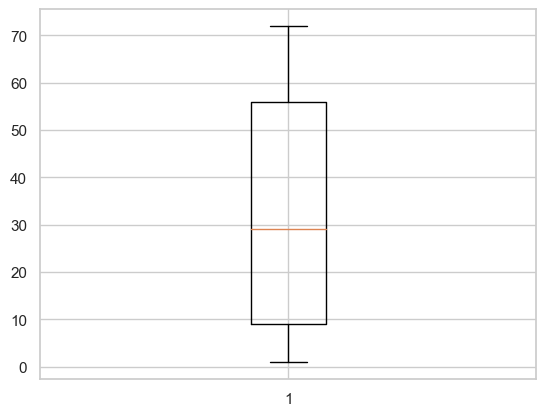

MonthlyCharges


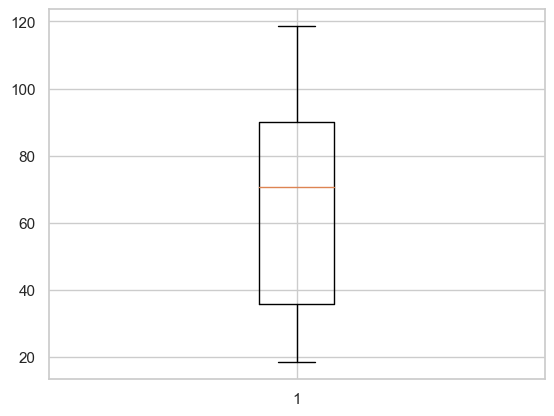

TotalCharges


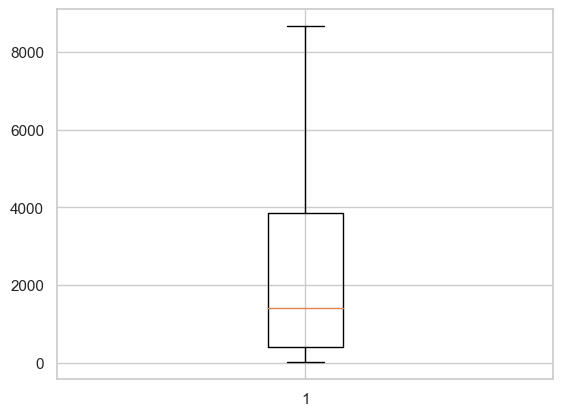

In [293]:
#Check for outliers in the numerical variables
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col)
    plt.boxplot(Data_All[col])
    plt.show()

#### Saving Train data set

In [294]:
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   int64  
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 
 17  

In [295]:
Data_All.reset_index(drop=True, inplace=True)

In [296]:
# save to csv

Data_All.to_csv('Train_Data.csv', index=False)

In [297]:
## Data Types
print("**Data Types**<br>")
Data_All.dtypes.value_counts()

**Data Types**<br>


object     16
int64       2
float64     2
Name: count, dtype: int64

#### clean test data

In [298]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [299]:
# Drop Customer ID column

data_xls.drop(columns='customerID', inplace=True)

In [300]:
# change Dtype of TotalCharges column from object to numeric

data_xls['TotalCharges'] = pd.to_numeric(data_xls['TotalCharges'], errors='coerce')

In [301]:
# view Missing Values in TotalCharges column

data_xls[np.isnan(data_xls['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
1380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN


In [302]:
# Drop rows where tenure = 0

data_xls.drop(labels=data_xls[data_xls['tenure'] == 0].index, axis=0, inplace=True)

In [303]:
data_xls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1997 non-null   object 
 1   SeniorCitizen     1997 non-null   int64  
 2   Partner           1997 non-null   object 
 3   Dependents        1997 non-null   object 
 4   tenure            1997 non-null   int64  
 5   PhoneService      1997 non-null   object 
 6   MultipleLines     1997 non-null   object 
 7   InternetService   1997 non-null   object 
 8   OnlineSecurity    1997 non-null   object 
 9   OnlineBackup      1997 non-null   object 
 10  DeviceProtection  1997 non-null   object 
 11  TechSupport       1997 non-null   object 
 12  StreamingTV       1997 non-null   object 
 13  StreamingMovies   1997 non-null   object 
 14  Contract          1997 non-null   object 
 15  PaperlessBilling  1997 non-null   object 
 16  PaymentMethod     1997 non-null   object 
 17  

In [304]:
data_xls.reset_index(drop=True, inplace=True)

In [305]:
data_xls.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [306]:
data_xls['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [307]:
# save to csv

data_xls.to_csv('Test_Data.csv', index=False)

## Univariate Analysis
Here is the section to explore, analyze, visualize each variable independently of the others.

#### Visualizations

####  What is the Distibution of Churn Rate

In [308]:
churn_data = Data_All['Churn'].value_counts()
churn_data

Churn
No     3698
Yes    1336
Name: count, dtype: int64

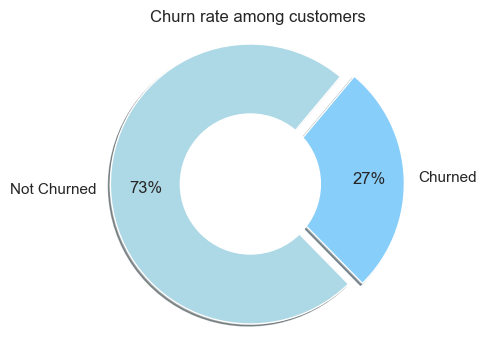

In [309]:
# Create a pie chart using Seaborn to visulaize churn rate
plt.figure(figsize=(4, 4))

plt.pie(churn_data, labels=['Not Churned','Churned'], colors=['LightBlue','LightSkyBlue'], startangle=50, shadow=True, radius=2,
     explode=(0,0.2),autopct='%1.0f%%', pctdistance=0.75 ,  )
Circle=plt.Circle((0,0), 1, color='white')
c= plt.gcf()

c.gca().add_artist(Circle)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Churn rate among customers')
plt.show()


## Bivariate & Multivariate Analysis
Here is the section to explore, analyze, visualize each variable in relation to the others.

Let's look at the relationship between Churn and Gender

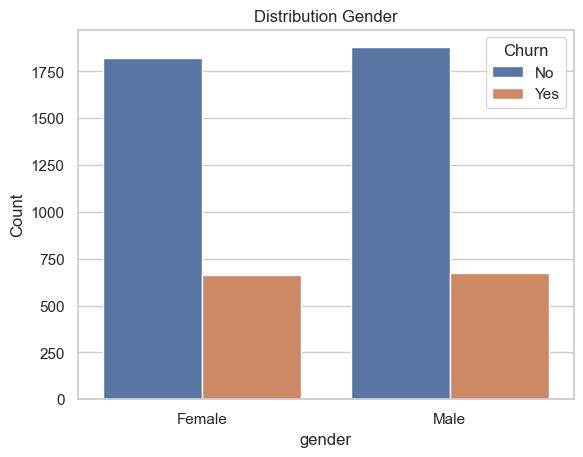

In [310]:
sns.countplot(x='gender',data=Data_All,hue='Churn')
plt.title('Distribution Gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

- The customer gender split is about 50/50 between males and females. no significant relationship between gender and churn rate

##### 1. How does customer tenure relate to churn rates? Are long-tenured customers more likely to stay with the company, and do new customers exhibit higher churn behavior?

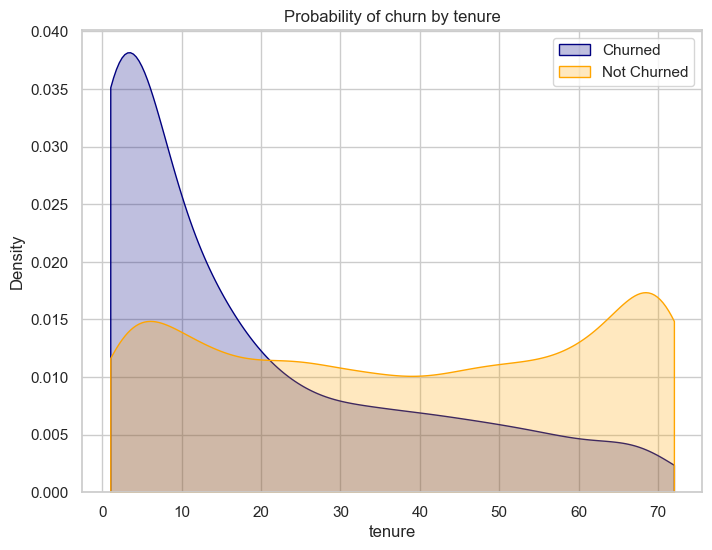

In [311]:
# We use a probability density distribution to show distribution of churn related to tenure

def kdeplot(x):
    plt.figure(figsize=(8,6))
    plt.title('Probability of churn by tenure')
    ax0= sns.kdeplot(Data_All[Data_All['Churn'] == 'Yes'][x], color='navy', label='Churn:Yes', fill =True, cut=0)
    ax1= sns.kdeplot(Data_All[Data_All['Churn'] == 'No'][x], color='orange', label='Churn:No', fill=True, cut=0)
    plt.legend(['Churned', 'Not Churned'], loc='upper right')
kdeplot('tenure')

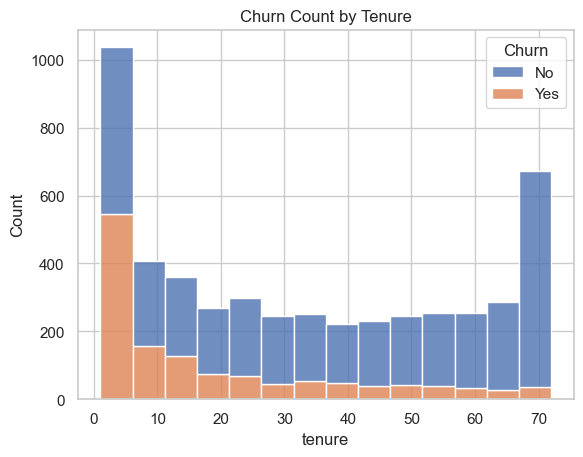

In [312]:
sns.histplot(x='tenure', hue='Churn', data=Data_All, bins=14, alpha=0.8, multiple='stack')
plt.title('Churn Count by Tenure')
plt.show()

- Customers with a lower tenure (recent customers) are more likely to churn.
- Customers on a longer tenure are less likely to churn.

##### 2. Is there a correlation between the total charges and churn rates? Do customers with higher total charges exhibit different churn behavior compared to those with lower total charges

Correlation coefficient: -0.19462794572064998
P-value: 3.6678433707849766e-44


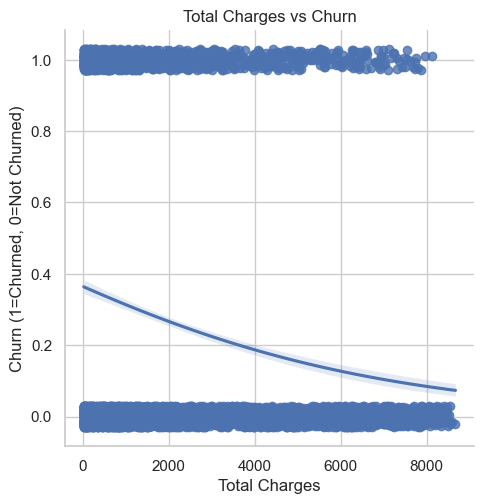

In [313]:
df_temp = pd.DataFrame(Data_All)

# Convert "TotalCharges" column to numeric type and then to integers
df_temp["TotalCharges"] = pd.to_numeric(df_temp["TotalCharges"], errors="coerce", downcast="integer")

# Convert "Churn" column to integers (1 for 'Yes' and 0 for 'No') only for this analysis
df_temp["Churn"] = df_temp["Churn"].map({"Yes": 1, "No": 0})

# Calculate the point-biserial correlation between TotalCharges and Churn
corr, p_value = pointbiserialr(df_temp["TotalCharges"], df_temp["Churn"])

# Print the correlation coefficient and p-value
print("Correlation coefficient:", corr)
print("P-value:", p_value)

# Plot the data points and visualize the relationship between TotalCharges and Churn
sns.lmplot(data=df_temp, x="TotalCharges", y="Churn", logistic=True, y_jitter=.03)
plt.xlabel("Total Charges")
plt.ylabel("Churn (1=Churned, 0=Not Churned)")
plt.title("Total Charges vs Churn")
plt.show()

The analysis shows a weak negative correlation between total charges and churn rates. As total charges increase, the likelihood of churn slightly decreases. The relationship is statistically significant (P-value < 0.05), but the effect is not very strong. Other factors may have a more significant impact on churn behavior.

##### 3. What is the impact of contract type on churn rates? Do customers on long-term contracts have significantly lower churn rates compared to those on short-term contracts?



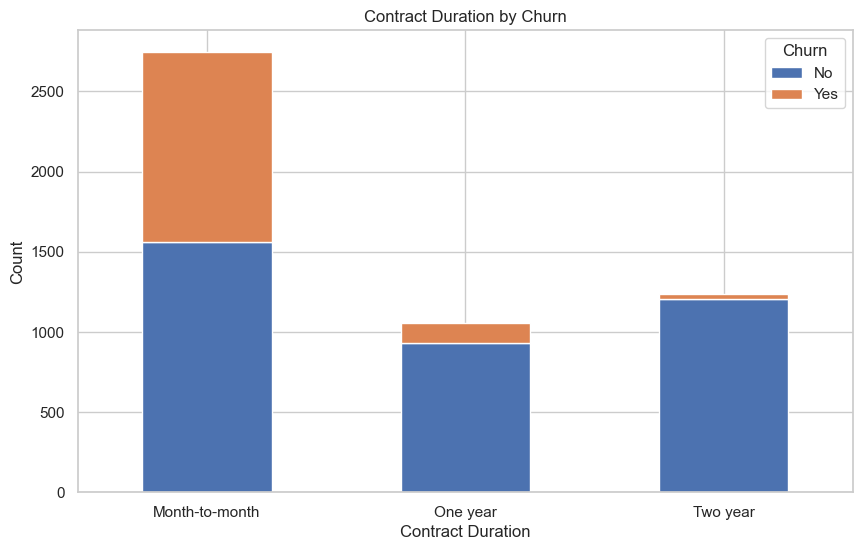

In [314]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['Contract'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn

ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Contract Duration by Churn")
plt.xlabel("Contract Duration")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()


- Customers with short term (month-to-month) contracts have higher churn rates than customers with long term (one year+ contracts) 
- Possible reasons could include price sensitivity, competition, ineffective onboarding, and changing needs. To reduce short-term churn, focus on personalized experiences, competitive pricing, and improving onboarding processes. Building strong customer relationships and demonstrating long-term value can encourage customer loyalty.

##### 4. Are there significant differences in churn behavior between customers who have device protection and those who don't?

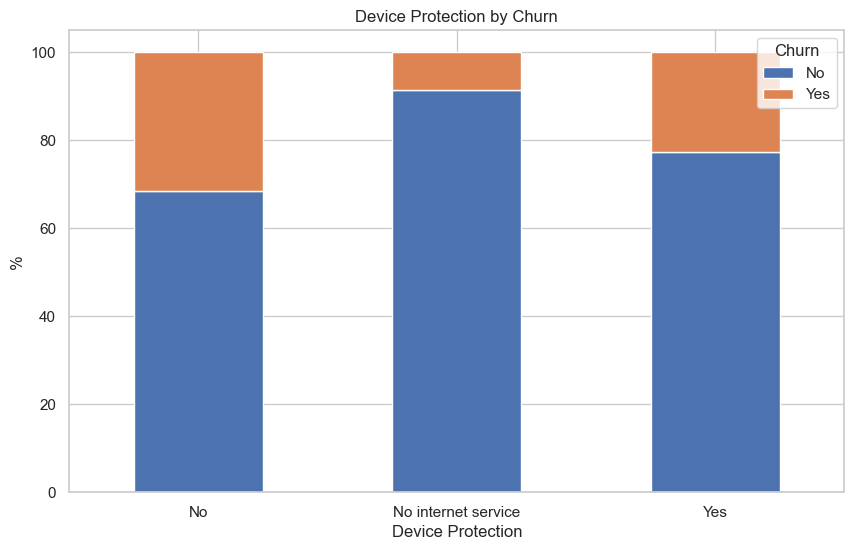

In [315]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['DeviceProtection'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
percentages = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = percentages.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Device Protection by Churn")
plt.xlabel("Device Protection")
plt.xticks(rotation=0)
plt.ylabel("%")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers without device protection are slightly more likelt to churn, although not significantly enough

##### 5. What is the relationship between the availability of tech support and churn rates? Are customers with access to tech support more likely to remain with the company?

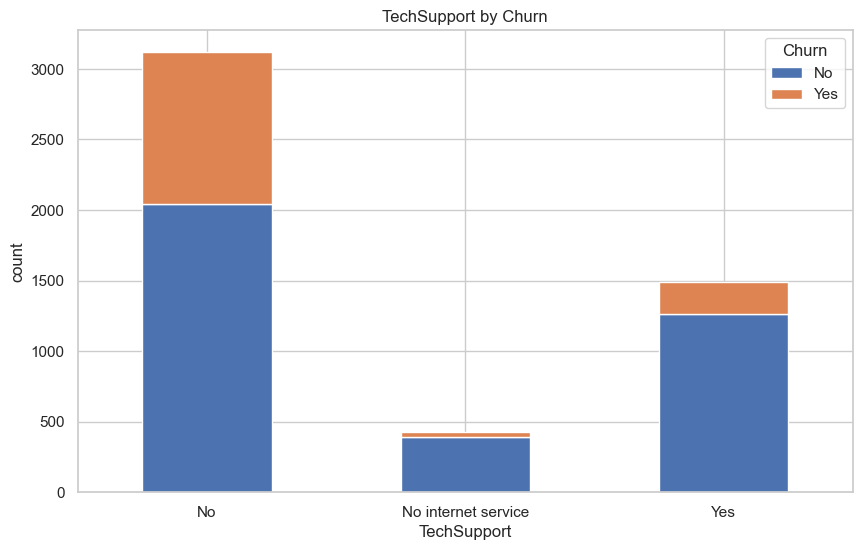

In [316]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['TechSupport'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("TechSupport by Churn")
plt.xlabel("TechSupport")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers with no tech support were more likely to churn

6. Do streaming services play a role in customer churn? Are customers with streaming services, such as StreamingTV and StreamingMovies, more likely to stay with the company?

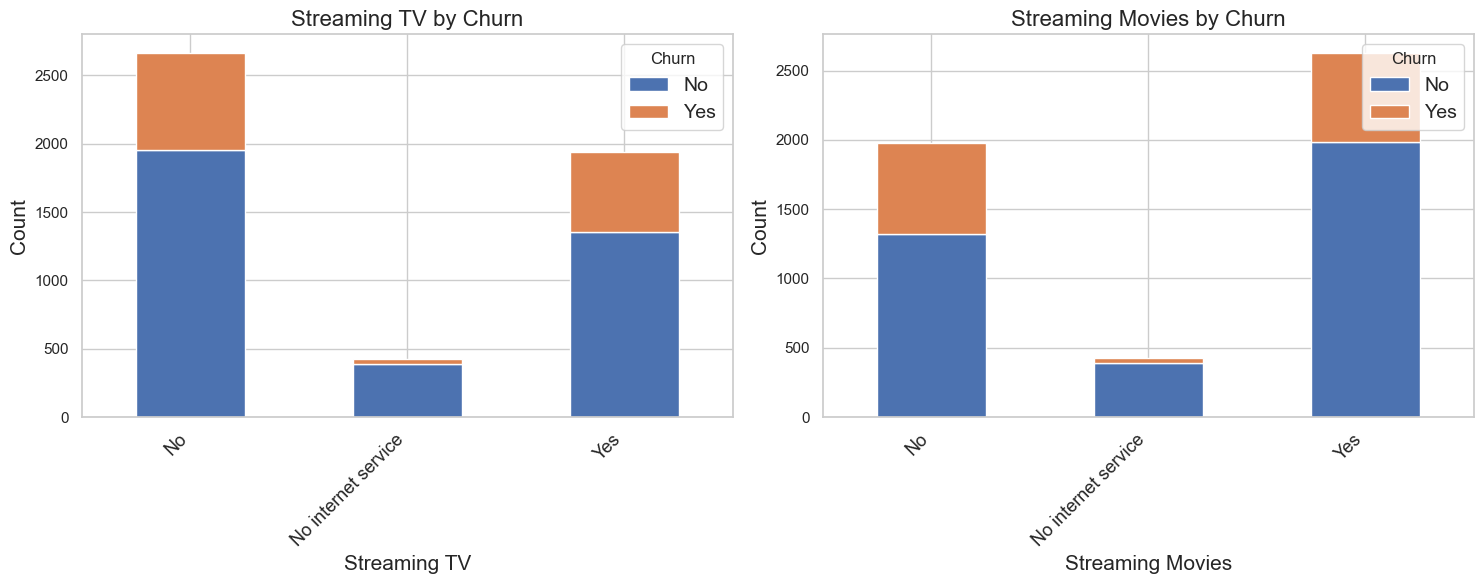

In [317]:
# Create a cross-tabulation (crosstab) of the two categorical columns and 'Churn' column
cross_tab1 = pd.crosstab(Data_All['StreamingTV'], Data_All['Churn'])
cross_tab2 = pd.crosstab(Data_All['StreamingMovies'], Data_All['Churn'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first stacked bar chart
cross_tab1.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Streaming TV by Churn", fontsize=16)
axes[0].set_xlabel("Streaming TV", fontsize=15)
axes[0].set_ylabel("Count", fontsize=15)
axes[0].legend(title="Churn", loc="upper right", fontsize=14)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Plot the second stacked bar chart
cross_tab2.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Streaming Movies by Churn", fontsize=16)
axes[1].set_xlabel("Streaming Movies",fontsize=15)
axes[1].set_ylabel("Count", fontsize=15)
axes[1].legend(title="Churn", loc="upper right", fontsize=14)

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=13)
# Adjust layout and display
plt.tight_layout()
plt.show()

- No significant relationship between streaming services and churn rates

7. How does the choice of payment method impact churn rates? Are customers with specific payment methods more prone to churn than others?

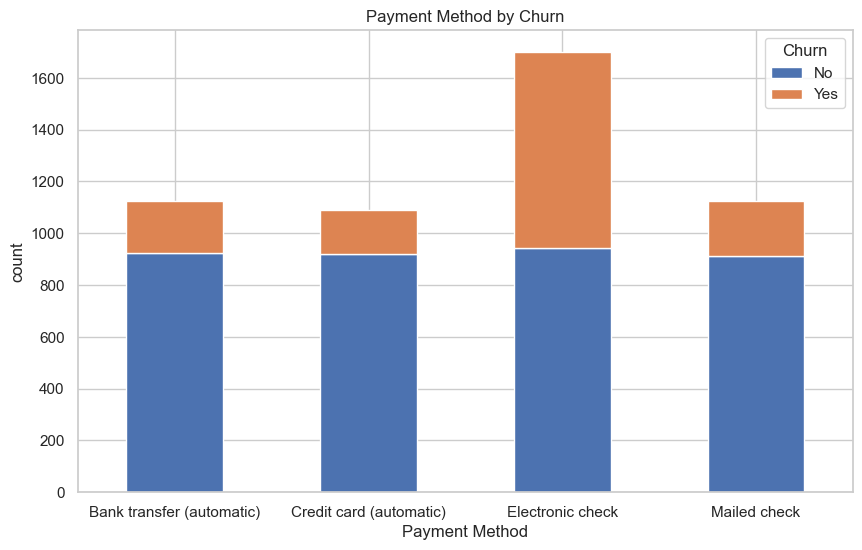

In [318]:
# Create a cross-tabulation (crosstab) of the categorical column and 'Churn' column
cross_tab = pd.crosstab(Data_All['PaymentMethod'], Data_All['Churn'])

# Plot the stacked bar plot using Seaborn
sns.set(style="whitegrid")
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Payment Method by Churn")
plt.xlabel("Payment Method")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.legend(title="Churn", loc="upper right")


plt.show()

- Customers who pay by electronic check were more likely to churn.

### Hypothesis Testing

Is there a significant relationship between customer tenure, monthly charges, total charges, and churn rate in the telecom company?

In [319]:
numeric_columns = Data_All.select_dtypes(include=['int64', 'float64']).drop('SeniorCitizen', axis=1)
numeric_columns.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.239642,0.826188
MonthlyCharges,0.239642,1.000000,0.646813
TotalCharges,0.826188,0.646813,1.000000


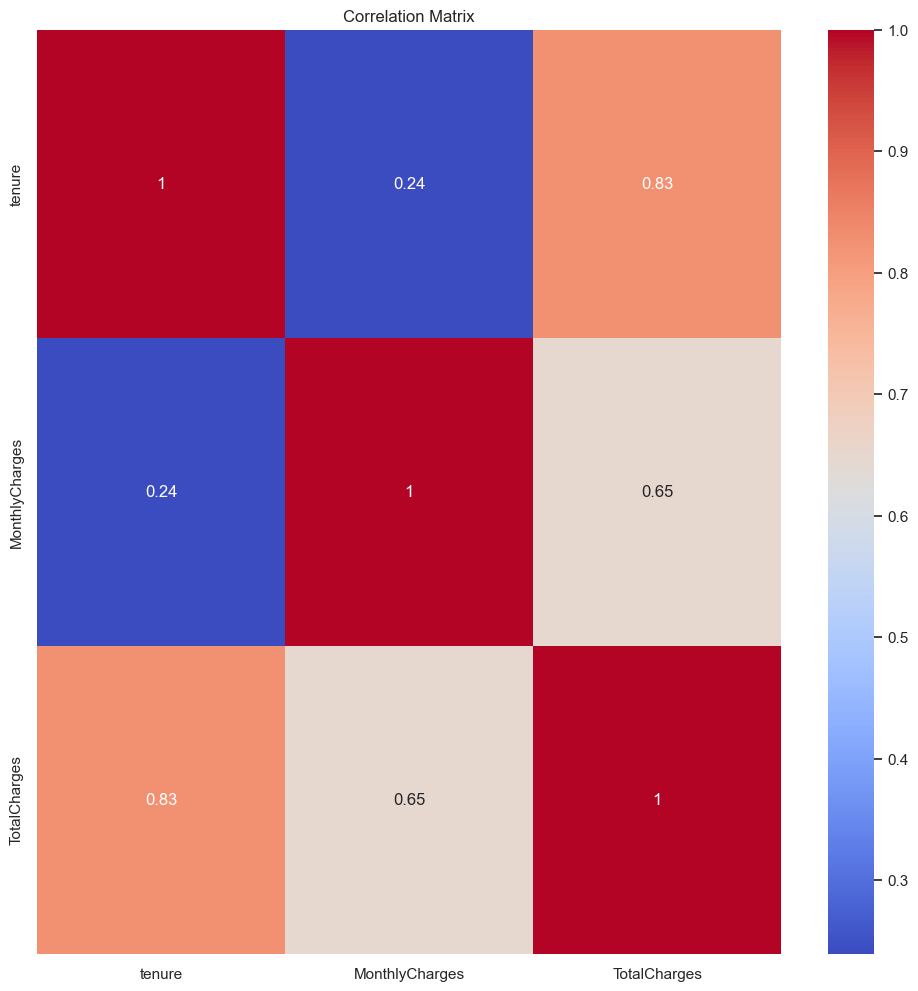

In [320]:
plt.figure(figsize=(12,12))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We will perfom normality test on the three numeric variables ie Monthly Charges, Total charges and Tenure.

In [321]:
import scipy.stats as stats

## D’Agostino’s K^2 Test on monthly charges
stat, p = stats.normaltest(Data_All['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is not normaly distributed')

Statistics=7510.47646, p=0.000
the sample is not normaly distributed


In [322]:
## D’Agostino’s K^2 Test on tenure
stat, p = stats.normaltest(Data_All['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is not normaly distributed')

Statistics=53555.33858, p=0.000
the sample is not normaly distributed


In [323]:
## D’Agostino’s K^2 Test on TotalCharges
stat, p = stats.normaltest(Data_All['TotalCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('the sample is normally distributed')
else:
	print('the sample is not normaly distributed')

Statistics=569.05463, p=0.000
the sample is not normaly distributed


# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

In [324]:
Data_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5034 non-null   object 
 1   SeniorCitizen     5034 non-null   int64  
 2   Partner           5034 non-null   object 
 3   Dependents        5034 non-null   object 
 4   tenure            5034 non-null   int64  
 5   PhoneService      5034 non-null   object 
 6   MultipleLines     5034 non-null   object 
 7   InternetService   5034 non-null   object 
 8   OnlineSecurity    5034 non-null   object 
 9   OnlineBackup      5034 non-null   object 
 10  DeviceProtection  5034 non-null   object 
 11  TechSupport       5034 non-null   object 
 12  StreamingTV       5034 non-null   object 
 13  StreamingMovies   5034 non-null   object 
 14  Contract          5034 non-null   object 
 15  PaperlessBilling  5034 non-null   object 
 16  PaymentMethod     5034 non-null   object 


In [325]:
Data_All.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [326]:
# check unique values of each column
for column in Data_All.columns:
    print('Column: {} - Unique Values: {}'.format(column, Data_All[column].unique()))

Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No' 'Yes' 'No phone service']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: StreamingTV - Unique Values: ['No' 'Yes' 'No internet service']

In [327]:
# Lets find out feature dependency on the target variable using mutual information score

from sklearn.metrics import mutual_info_score

x_cat = Data_All.select_dtypes(include=object).drop('Churn', axis=1)
y_cat = Data_All['Churn']

mi_scores = []

for column in x_cat.columns:
    mi_score = mutual_info_score(x_cat[column], y_cat)
    mi_scores.append((column, mi_score))

mi_scores.sort(key=lambda x: x[1], reverse=True)

for feature, score in mi_scores:
    print(f"Feature: {feature}, Mutual Information Score: {score}")

Feature: Contract, Mutual Information Score: 0.10284790516675524
Feature: InternetService, Mutual Information Score: 0.05944428811167132
Feature: PaymentMethod, Mutual Information Score: 0.04163984913943765
Feature: TechSupport, Mutual Information Score: 0.030007109249305178
Feature: OnlineSecurity, Mutual Information Score: 0.029670157336360276
Feature: PaperlessBilling, Mutual Information Score: 0.019508874345666505
Feature: OnlineBackup, Mutual Information Score: 0.015826778687180174
Feature: Dependents, Mutual Information Score: 0.015615368107435551
Feature: DeviceProtection, Mutual Information Score: 0.013717699147021103
Feature: StreamingMovies, Mutual Information Score: 0.013349078621584257
Feature: Partner, Mutual Information Score: 0.010018147440621322
Feature: StreamingTV, Mutual Information Score: 0.009953736504141789
Feature: MultipleLines, Mutual Information Score: 0.0008281912846177519
Feature: PhoneService, Mutual Information Score: 0.00010045042468448395
Feature: gender

In [328]:
features = [score[0] for score in mi_scores]
scores = [score[1] for score in mi_scores]

# Create a bar plot using Plotly
fig = px.bar(x=scores, y=features, orientation='h', color=scores,
             labels={'x': 'Mutual Information Score', 'y': 'Features'},
             title='Categorical Features Relationship with Target (Churn)',
             template='plotly',
             color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

## Label Encoding

In [329]:
df_encode = Data_All.copy()

# label encoding (binary variables)
label_encode_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encode_cols:
    if column == 'gender':
         df_encode[column] = df_encode[column].map({'Female': 1, 'Male': 0})
    else: 
         df_encode[column] = df_encode[column].map({'Yes': 1, 'No': 0})

In [330]:
df_encode.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850000,29.850000,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950001,1889.500000,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.849998,108.150002,1
3,0,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.299999,1840.750000,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.699997,151.649994,1


## Dataset Splitting

In [331]:
X = df_encode.drop(columns=['Churn'])
y = df_encode['Churn']

In [332]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [333]:
(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

((4027, 19), (1007, 19), (4027,), (1007,))

## Features encoding

In [334]:
# One hot encoding for categorical columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# Create the transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), categorical_columns)
)

#### X_train

In [335]:
# Transform the data
transformed_data = transformer.fit_transform(X_train[categorical_columns])

In [336]:
# Transformating back
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_train.index
# Joining tables
X_train = pd.concat([X_train, transformed_df], axis=1)
# Dropping old categorical columns
X_train.drop(categorical_columns, axis=1, inplace=True)
# CHecking result
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
3574,0,0,1,1,68,1,1,113.150000,7856.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1814,1,0,1,1,61,0,0,51.349998,3244.399902,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
423,0,0,1,1,44,1,0,25.700001,1110.500000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1486,1,0,0,0,1,1,0,19.549999,19.549999,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4136,0,0,1,1,50,1,1,20.350000,938.950000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### X_test

In [337]:
# Transform the data
transformed_data = transformer.transform(X_test[categorical_columns])

In [338]:
# Transformating back
transformed_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_test.index
# Joining tables
X_test = pd.concat([X_test, transformed_df], axis=1)
# Dropping old categorical columns
X_test.drop(categorical_columns, axis=1, inplace=True)
# CHecking result
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check
4099,0,0,0,0,2,1,1,55.100000,113.350000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1357,0,0,0,0,4,1,1,70.199997,237.949997,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,0,0,1,0,28,1,0,96.599998,2684.350098,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3919,0,0,0,0,6,1,0,78.650000,483.300000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3389,1,0,0,1,35,1,1,20.100000,644.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [339]:
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__Stre

In [340]:
# Renaming columns

X_train.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
                   'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                   'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
                   'InternetService_DSL','InternetService_Fiber','InternetService_No',
                   'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
                   'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
                   'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
                   'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
                   'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
                   'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
                   'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
                   'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

X_test.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
                   'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                   'MultipleLines_No','MultipleLines_No phone service','MultipleLines_Yes',
                   'InternetService_DSL','InternetService_Fiber','InternetService_No',
                   'OnlineSecurity_No','OnlineSecurity_NoInternetService','OnlineSecurity_Yes',
                   'OnlineBackup_No','OnlineBackup_NoInternetService','OnlineBackup_Yes',
                   'DeviceProtection_No','DeviceProtection_NoInternetService','DeviceProtection_Yes',
                   'TechSupport_No', 'TechSupport_NoInternetService','TechSupport_Yes',
                   'StreamingTV_No', 'StreamingTV_NoInternetService','StreamingTV_Yes',
                   'StreamingMovies_No','StreamingMovies_NoInternetService','StreamingMovies_Yes',
                   'Contract_Month-to-month','Contract_One year', 'Contract_Two year',
                   'PaymentMethod_BankTransfer','PaymentMethod_CreditCard','PaymentMethod_ElectronicCheck','PaymentMethod_MailedCheck']

In [341]:
X_train.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
3574,0,0,1,1,68,1,1,113.150000,7856.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1814,1,0,1,1,61,0,0,51.349998,3244.399902,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
423,0,0,1,1,44,1,0,25.700001,1110.500000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1486,1,0,0,0,1,1,0,19.549999,19.549999,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4136,0,0,1,1,50,1,1,20.350000,938.950000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [342]:
X_test.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
4099,0,0,0,0,2,1,1,55.100000,113.350000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1357,0,0,0,0,4,1,1,70.199997,237.949997,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,0,0,1,0,28,1,0,96.599998,2684.350098,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3919,0,0,0,0,6,1,0,78.650000,483.300000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3389,1,0,0,1,35,1,1,20.100000,644.500000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [343]:
X_train.isnull().sum()

Gender                                0
SeniorCitizen                         0
Partner                               0
Dependents                            0
Tenure                                0
PhoneService                          0
PaperlessBilling                      0
MonthlyCharges                        0
TotalCharges                          0
MultipleLines_No                      0
MultipleLines_No phone service        0
MultipleLines_Yes                     0
InternetService_DSL                   0
InternetService_Fiber                 0
InternetService_No                    0
OnlineSecurity_No                     0
OnlineSecurity_NoInternetService      0
OnlineSecurity_Yes                    0
OnlineBackup_No                       0
OnlineBackup_NoInternetService        0
OnlineBackup_Yes                      0
DeviceProtection_No                   0
DeviceProtection_NoInternetService    0
DeviceProtection_Yes                  0
TechSupport_No                        0


## Features Scaling

In [344]:
# standardization for numeric values

from sklearn.preprocessing import StandardScaler

cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[cols])
X_test_scaled = scaler.transform(X_test[cols])

In [345]:
# Create new DataFrames with the scaled values
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cols, index=X_test.index)

# Drop the original unscaled columns
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)

# Concatenate the scaled columns with the original DataFrames
X_train = pd.concat([X_train, X_train_scaled_df], axis=1)
X_test = pd.concat([X_test, X_test_scaled_df], axis=1)

In [346]:
X_train.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber,InternetService_No,OnlineSecurity_No,OnlineSecurity_NoInternetService,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_NoInternetService,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_NoInternetService,DeviceProtection_Yes,TechSupport_No,TechSupport_NoInternetService,TechSupport_Yes,StreamingTV_No,StreamingTV_NoInternetService,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_NoInternetService,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_BankTransfer,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,Tenure,MonthlyCharges,TotalCharges
3574,0,0,1,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.444677,1.597538,2.457884
1814,1,0,1,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.158312,-0.458791,0.416487
423,0,0,1,1,1,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.462853,-1.312268,-0.528117
1486,1,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.296247,-1.516902,-1.011043
4136,0,0,1,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.708309,-1.490283,-0.604056


## Train set Balancing (SMOTE Algorithm)

In [347]:
# apply SMOTE to the training data (oversampling)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto')

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [348]:
# check shape after resampling

pd.DataFrame(X_train_resampled).shape, pd.DataFrame(y_train_resampled).shape

((5916, 40), (5916, 1))

In [349]:
# view class distribution

pd.value_counts(pd.Series(y_train_resampled))

Churn
1    2958
0    2958
Name: count, dtype: int64

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## 1. Logistic Regression Model

### Create the Model

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression(random_state=42)

### Train the Model

In [351]:
LR.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

### Predict on a unknown dataset (Testset)

In [352]:
predictions = LR.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [353]:
# calculate accuracy 
print("Classification Report:\n", classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82       740
           1       0.53      0.78      0.63       267

    accuracy                           0.76      1007
   macro avg       0.72      0.76      0.73      1007
weighted avg       0.80      0.76      0.77      1007



## 2. K-nearest Neighbors

### Create the Model

In [354]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Train the Model

In [355]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

### Predict on a unknown dataset (Testset)

In [356]:
y_pred_knn = knn.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [357]:
print("Classification Report for k-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

Classification Report for k-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.87      0.70      0.78       740
           1       0.47      0.72      0.57       267

    accuracy                           0.71      1007
   macro avg       0.67      0.71      0.67      1007
weighted avg       0.77      0.71      0.72      1007



## 3. Random Forest Classifier

### Create the Model

In [358]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(random_state=42)

### Train the Model

In [359]:
rfm.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### Predict on a unknown dataset (Testset)

In [360]:
y_pred_rfm = rfm.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [361]:
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rfm))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       740
           1       0.60      0.59      0.60       267

    accuracy                           0.79      1007
   macro avg       0.73      0.72      0.73      1007
weighted avg       0.79      0.79      0.79      1007



## 4. Support Vector Machines

### Create the Model

In [362]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

### Train the Model

In [363]:
svm.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

### Predict on a unknown dataset (Testset)

In [364]:
y_pred_svm = svm.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [365]:
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       740
           1       0.55      0.73      0.63       267

    accuracy                           0.77      1007
   macro avg       0.72      0.76      0.73      1007
weighted avg       0.80      0.77      0.78      1007



## 5. Gradient Boosting

### Create the Model

In [366]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

### Train the Model

In [367]:
gb.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

### Predict on a unknown dataset (Testset)

In [368]:
y_pred_gb = gb.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [369]:
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_gb))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       740
           1       0.59      0.71      0.64       267

    accuracy                           0.79      1007
   macro avg       0.74      0.77      0.75      1007
weighted avg       0.81      0.79      0.80      1007



## 6. XGBoost

### Create the Model

In [370]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)

### Train the Model

In [371]:
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

### Predict on a unknown dataset (Testset)

In [372]:
y_pred_xgb = svm.predict(X_test)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [373]:
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       740
           1       0.55      0.73      0.63       267

    accuracy                           0.77      1007
   macro avg       0.72      0.76      0.73      1007
weighted avg       0.80      0.77      0.78      1007



## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

In [374]:
from sklearn.metrics import accuracy_score

model_names = ['Logistic Regression', 'k-NN', 'Random Forest', 'SVM','Gradient Boosting','XGBoost']
models = [LR, knn, rfm, svm, gb, xgb]
model_names_list = []
accuracy_scores = []

# Loop through each model to calculate accuracy and store information
for name, model in zip(model_names, models):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store model name and accuracy score
    model_names_list.append(name)
    accuracy_scores.append(accuracy)

# Create a DataFrame
accuracy_df = pd.DataFrame({'Model': model_names_list, 'Accuracy': accuracy_scores})
accuracy_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
5,XGBoost,0.794439
4,Gradient Boosting,0.790467
2,Random Forest,0.787488
3,SVM,0.771599
0,Logistic Regression,0.757696
1,k-NN,0.707051


## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [375]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [376]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app